In [ ]:

# Connecting with Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = False)

Mounted at /content/gdrive


In [ ]:

!curl -s https://course.fast.ai/setup/colab | bash


bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
{'kaggle.json': b'{"username":"joshi98kishan","key":"949c2744c32ffa210a19e4f460e5302a"}'}

{'kaggle.json': b'{"username":"joshi98kishan","key":"949c2744c32ffa210a19e4f460e5302a"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download rashedoz/crowdai-plant-disease-dataset -p /content/gdrive/My\ Drive/kaggle/Leaf-Disease-Dataset --unzip


Dataset URL: https://www.kaggle.com/datasets/rashedoz/crowdai-plant-disease-dataset
License(s): unknown
100% 943M/947M [00:15<00:00, 52.3MB/s]
100% 947M/947M [00:15<00:00, 64.0MB/s]


In [ ]:

# setting a root_dir and base_dir
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'kaggle/'

In [ ]:
from pathlib import Path # import the Path class from the pathlib module

# setting a root_dir and base_dir
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'kaggle/'


# I have renamed some folders from original dataset, like
# 'Custom-Train-Test(color)' -> 'Leaf-Disease-Dataset'
# 'Test' -> 'valid'
# 'color' -> 'train'
# So, that now our dataset matches MNIST dataset and we can directly create DataBunch from 'ImageDataBunch.from_folder'
path_data = Path(base_dir + 'Leaf-Disease-Dataset/')
[x for x in path_data.iterdir()] # Use iterdir() to iterate through the contents of the directory.

[PosixPath('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/Leaf-Disease-Dataset'),
 PosixPath('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/leaf')]

In [ ]:
# Install FastAI and import necessary modules
!pip install -q fastai # install fastai library
from fastai.vision.all import *

# Path to your data folder
path_data = Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset')

# Create an ImageDataLoaders object with transformations and ImageNet normalization
data = ImageDataLoaders.from_folder(path_data,
                                    valid_pct=0.2,      # Split 20% of data for validation
                                    item_tfms=Resize(224),   # Resize images to 224x224
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],  # Augment the data and normalize
                                    bs=64) # Set batch size

# Display the data object to check dataset info
data

In [ ]:
#Print the data object to display its properties
print(data)

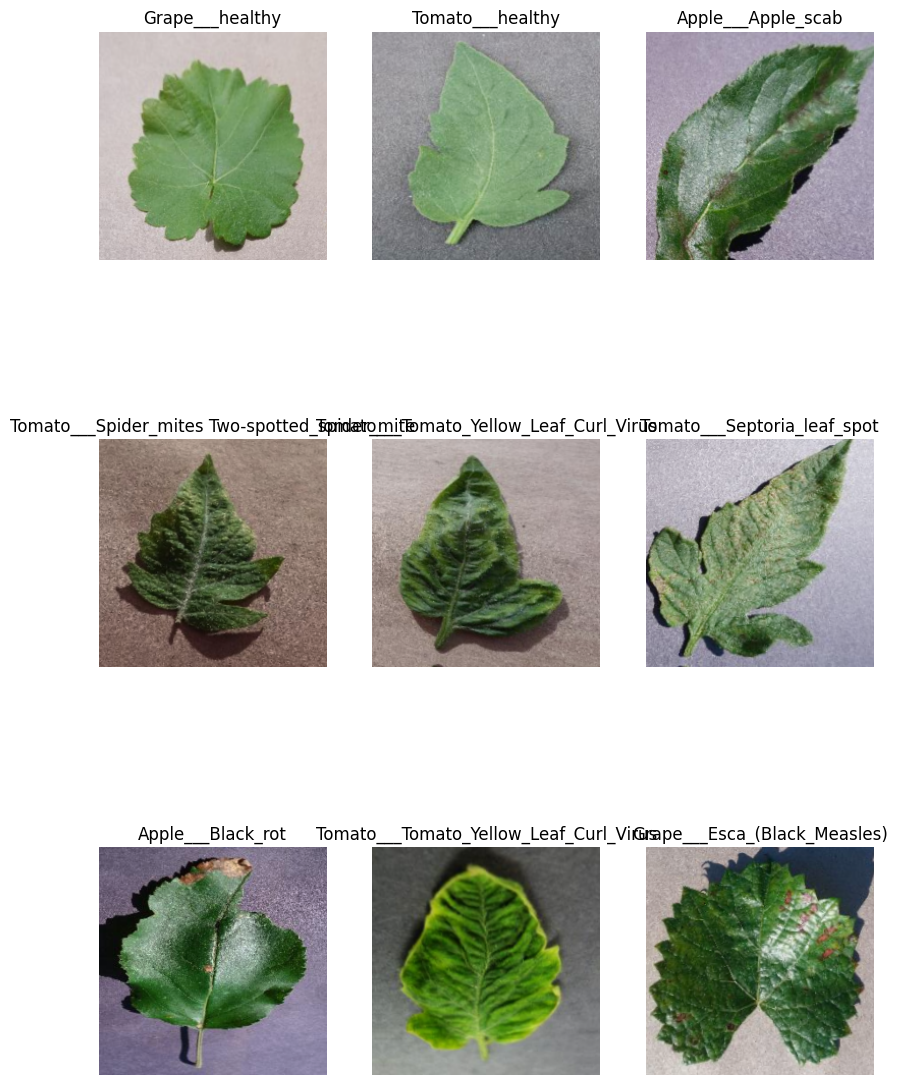

In [ ]:
data.show_batch(nrows=3, figsize=(10, 15)) # Use nrows instead of rows

In [ ]:
# Install FastAI and import necessary modules
!pip install -q fastai # install fastai library
from fastai.vision.all import *

# Path to your data folder
path_data = Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset')

# Create an ImageDataLoaders object with transformations and ImageNet normalization
data = ImageDataLoaders.from_folder(path_data,
                                    valid_pct=0.2,      # Split 20% of data for validation
                                    item_tfms=Resize(224),   # Resize images to 224x224
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)],  # Augment the data and normalize
                                    bs=64) # Set batch size

# Display the data object to check dataset info
data

# Access the classes using data.vocab
data.vocab

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 34.9MB/s]


In [ ]:

#Now training a model, first with 'freeze', means using pretrained weights of 'Imagenet'
#and then with 'unfreeze', means training all the layers

#By default, fastai train a model with 'freeze'
#for 'unfreezing' a model, you have to explicit call unfreeze()

In [ ]:

learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.159246,0.106655,0.035038,04:26
1,0.079164,0.049457,0.016912,04:26


In [ ]:

learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.071258,0.043183,0.015051,04:30
1,0.049375,0.023611,0.007768,04:27


In [ ]:

learn.save('s1-e4-res34')

Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models/s1-e4-res34.pth')

In [ ]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.036302,0.020605,0.006797,04:26


In [ ]:

learn.save('s2-e5-res34')

Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models/s2-e5-res34.pth')

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.033167,0.019343,0.006312,04:28


In [ ]:
learn.load('s2-e5-res34')


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [ ]:

#Creating a Interpretation object, this object helps us in various analysis.
interp = ClassificationInterpretation.from_learner(learn)

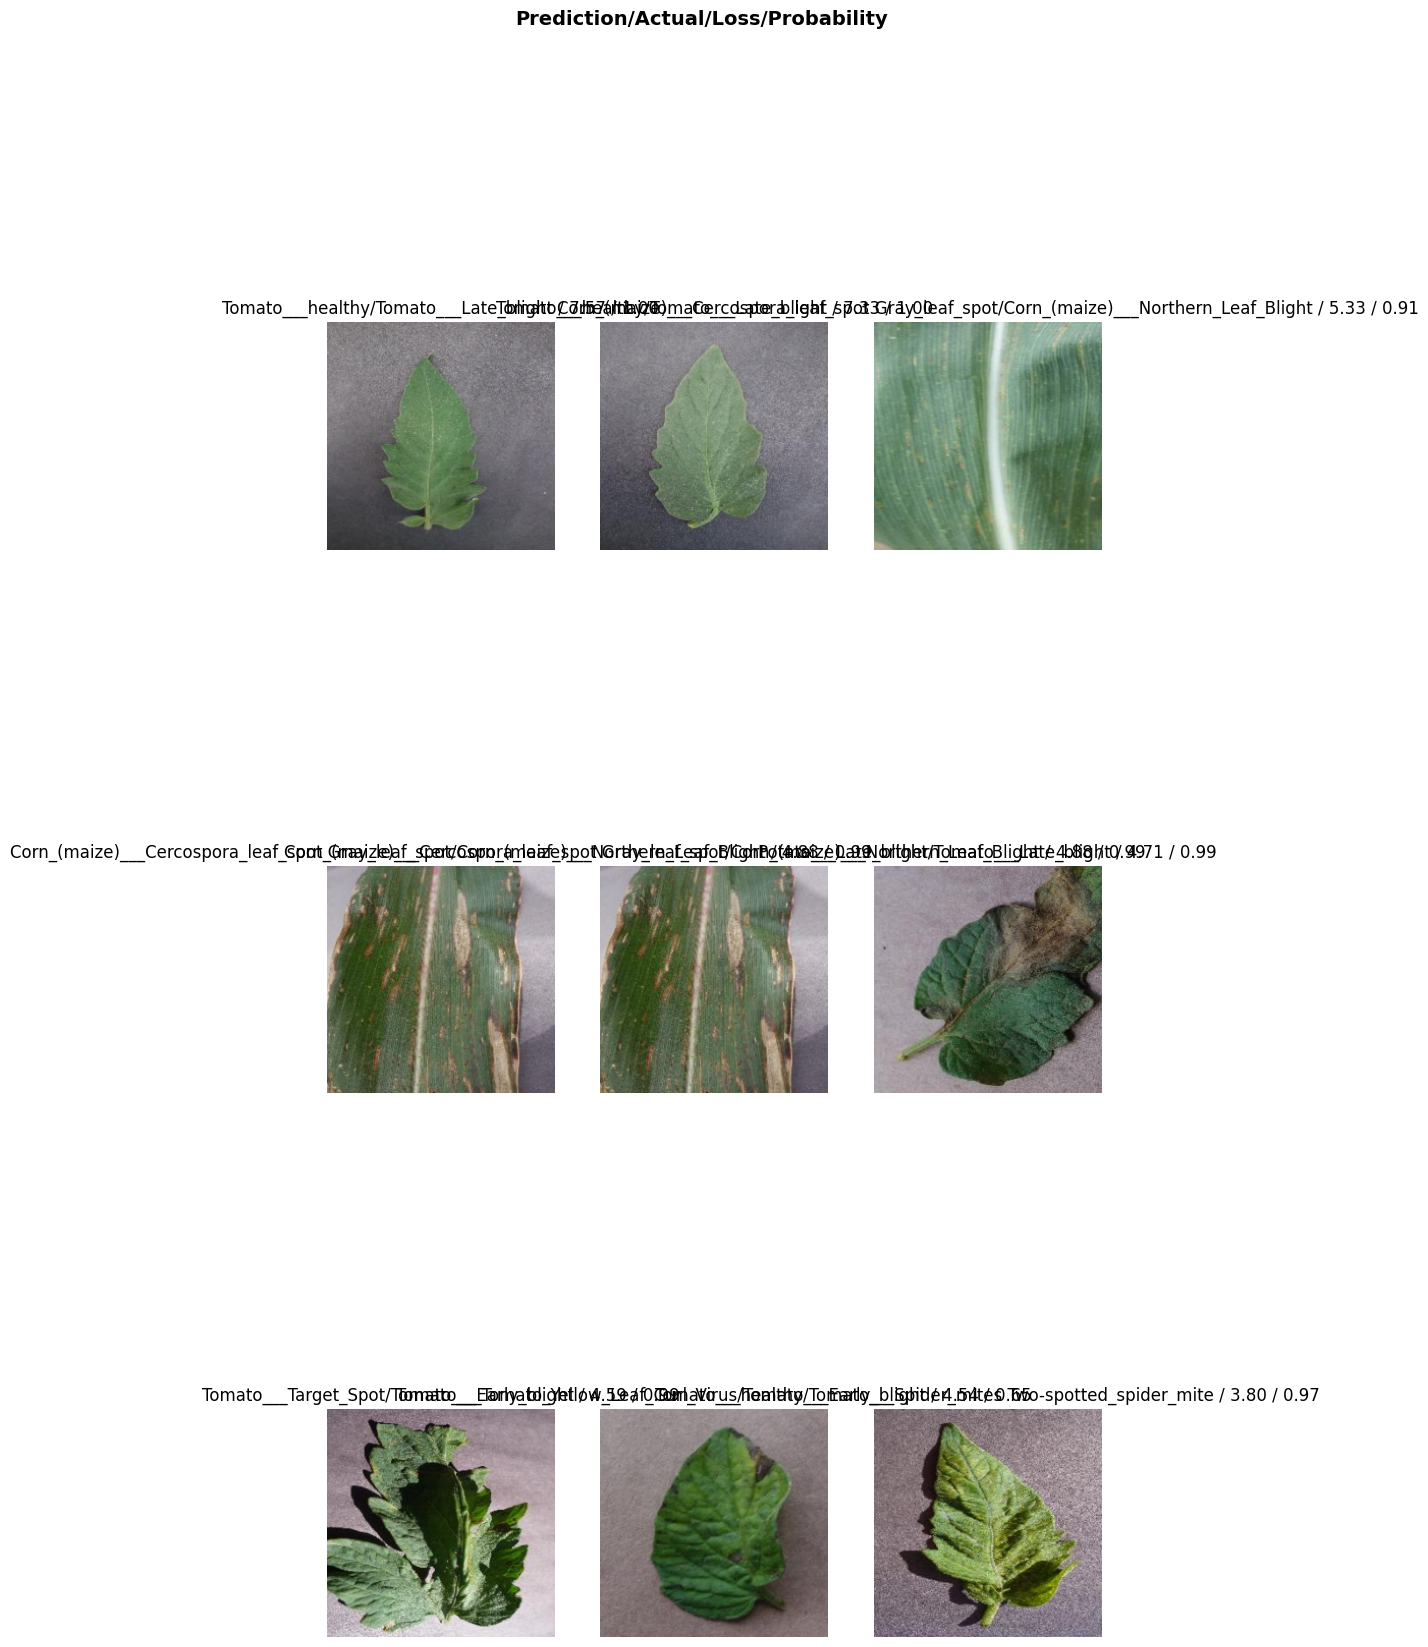

In [ ]:
#The heatmap argument is not supported by plot_top_losses()
interp.plot_top_losses(9, figsize = (10, 20))

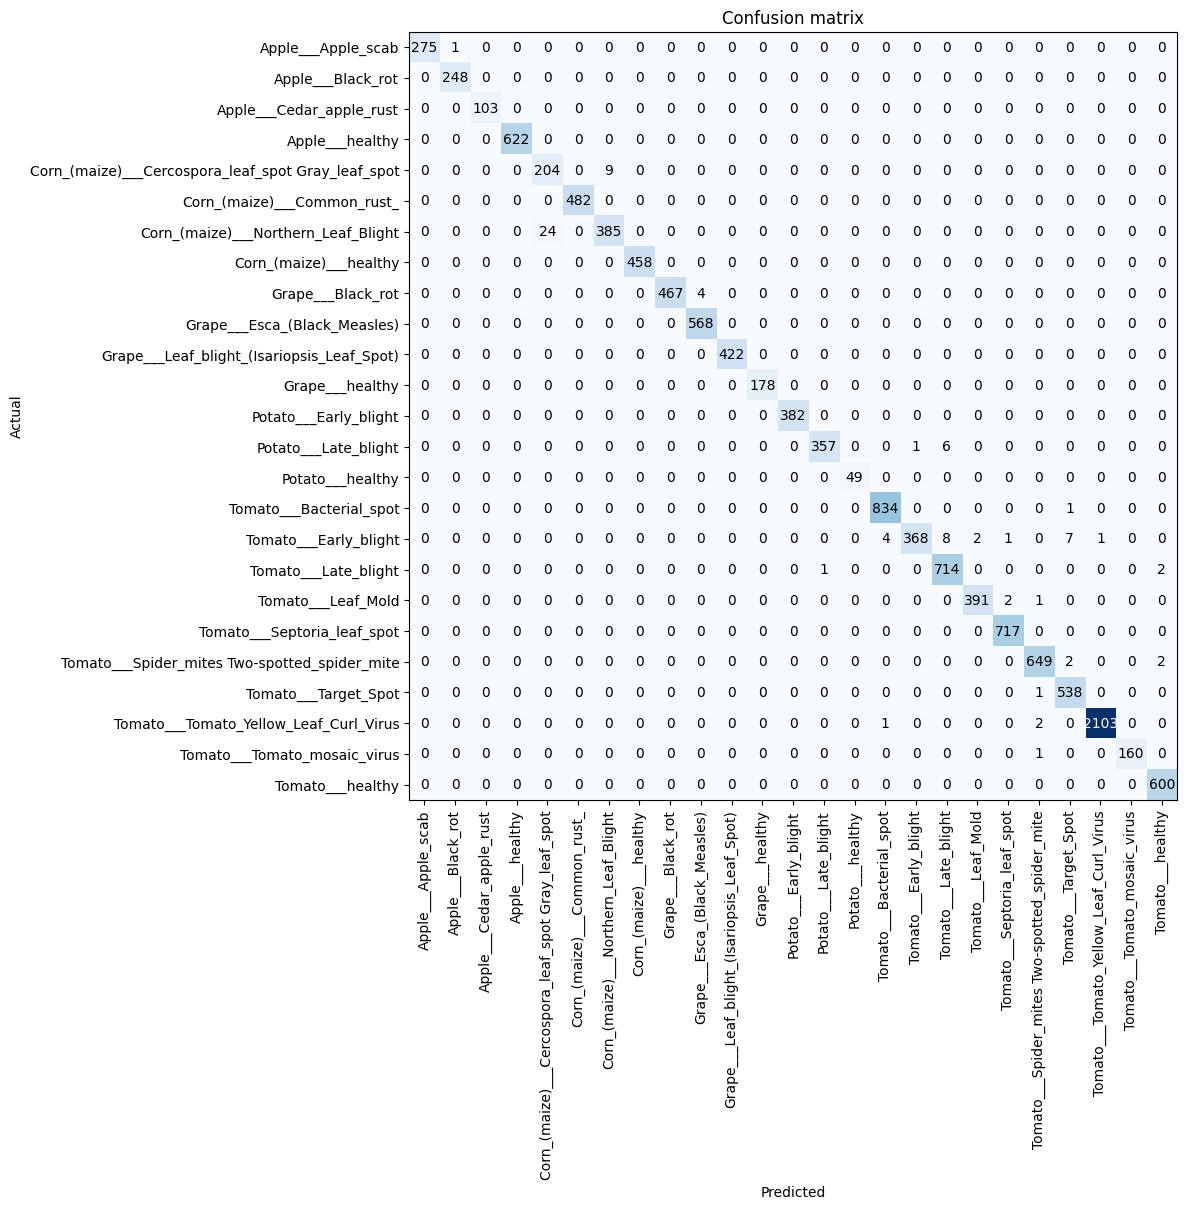

In [ ]:

interp.plot_confusion_matrix(figsize = (12, 12))

In [ ]:

#Shows samples which our model get most confused with
interp.most_confused()

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  24),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  9),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 8),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 7),
 ('Potato___Late_blight', 'Tomato___Late_blight', 6),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 4),
 ('Tomato___Early_blight', 'Tomato___Bacterial_spot', 4),
 ('Tomato___Early_blight', 'Tomato___Leaf_Mold', 2),
 ('Tomato___Late_blight', 'Tomato___healthy', 2),
 ('Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 2),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___healthy', 2),
 ('Tomato___Tomato_Yellow_Leaf_Curl_Virus',
  'Tomato___Spider_mites Two-spotted_spider_mite',
  2),
 ('Apple___Apple_scab', 'Apple___Black_rot', 1),
 ('Potato___Late_blight', 'Tomato___Early_blig

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0002754228771664202)

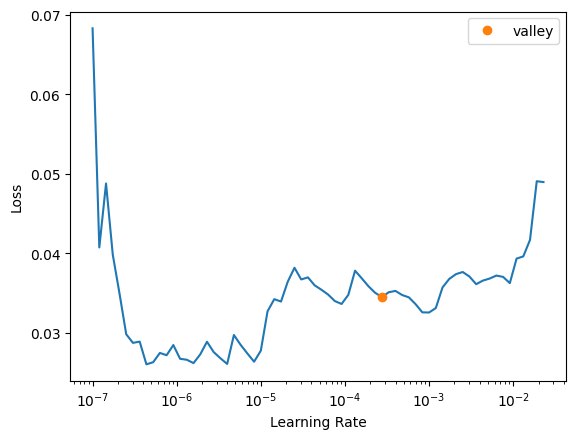

In [ ]:
learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.046066,0.023653,0.007364,05:12


In [ ]:

learn.save('s3-unfr-e1-res34')


Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models/s3-unfr-e1-res34.pth')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

epoch,train_loss,valid_loss,accuracy,time
0,3.326729,2.431721,0.342207,04:00


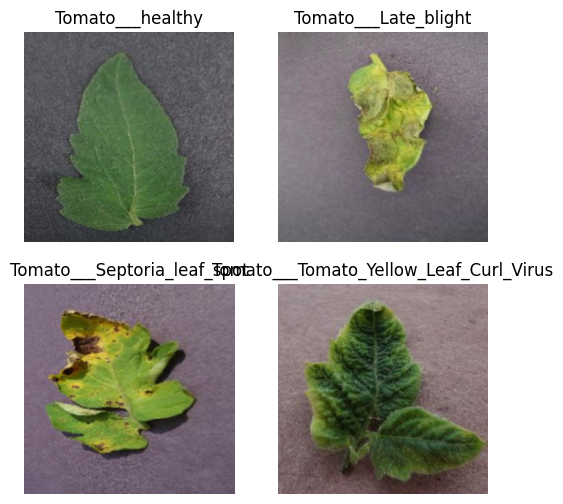

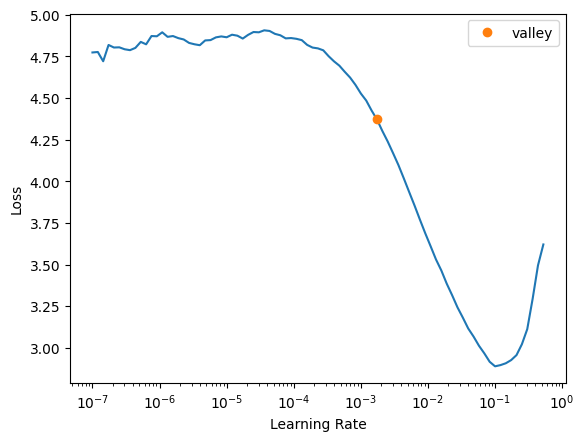

In [ ]:
# Install FastAI if needed
!pip install -q fastai

# Import necessary modules
from fastai.vision.all import *

# Path to your data
path_data = Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset')

# Step 1: Load the data
data = ImageDataLoaders.from_folder(path_data,
                                    valid_pct=0.2,
                                    item_tfms=Resize(224),
                                    batch_tfms=aug_transforms(),
                                    bs=64)

# Step 2: Check if data is loaded correctly
data.show_batch(max_n=4)  # Display a few sample images to ensure the data is correct

# Step 3: Create the learner using a model architecture (try resnet18 if resnet34 fails)
# Use normalize parameter here
learn = cnn_learner(data, resnet18, metrics=accuracy, normalize=imagenet_stats)

# Step 4: Find a good learning rate (optional step)
learn.lr_find()  # This will give a graph to help you choose the optimal learning rate

# Step 5: Train the model using fit_one_cycle
# Use lr_max instead of max_lr
learn.fit_one_cycle(1, lr_max=slice(1e-6, 1e-5))  # Use a wider range if needed like slice(1e-4, 1e-2)

In [ ]:
learn.save('s4-unfr-e3-res34')

Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models/s4-unfr-e3-res34.pth')

In [ ]:
learn.fit_one_cycle(1, lr_max = slice(1e-6, 1e-5)) # Use lr_max instead of max_lr

epoch,train_loss,valid_loss,accuracy,time
0,2.427478,1.647901,0.550898,04:00


In [ ]:

learn.save('s5-unfr-e4-res34')

Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models/s5-unfr-e4-res34.pth')

In [ ]:
learn.load('s5-unfr-e4-res34')

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [ ]:
learn.fit_one_cycle(1, lr_max = slice(1e-6, 1e-5)) # Use lr_max instead of max_lr

epoch,train_loss,valid_loss,accuracy,time
0,1.969005,1.249879,0.655203,03:58


In [ ]:

learn.save('s6-unfr-e5-res34')

Path('/content/gdrive/My Drive/kaggle/Leaf-Disease-Dataset/models/s6-unfr-e5-res34.pth')

In [ ]:
  learn.fit_one_cycle(1, lr_max = slice(1e-6, 1e-5)) # Use lr_max instead of max_lr

epoch,train_loss,valid_loss,accuracy,time
0,1.612456,1.008936,0.715083,03:58


In [ ]:
# Validate on the validation set to get accuracy
val_loss, val_accuracy = learn.validate()

# Print the validation loss as a percentage
print(f'Validation Loss: {val_loss * 100:.4f}%')

# Print the validation accuracy as a percentage
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')  # Format to 2 decimal places


Validation Loss: 100.8936%
Validation Accuracy: 71.51%


In [ ]:
from fastai.vision.all import *
